In [32]:
import torch


from model_architectures import MonaiDDPM
device = "cuda:0" if torch.cuda.is_available() else "cpu"


T = 1_000     

ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/025_MNIST_basic_DDPM/checkpoints/ddpm-epoch=08-train_loss=0.0017.ckpt" # MNIST EXAMPLE> WORKED WELL.
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/026_DDPM_revamped/checkpoints/ddpm-epoch=01-train_loss=0.3648.ckpt" # 
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/027_DDPM_MONAI/checkpoints/ddpm-epoch=09-step=39210.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/031_DDPM_classifier-free-test/checkpoints/epoch=09-step=9810.ckpt"
# ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/032_cDDPM_512x512-test-prog/checkpoints/best_64px.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/037_cDDPM_256x256/checkpoints/epoch=22-step=7843.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/041_cDDPM_128x128/checkpoints/epoch=16-step=5797.ckpt"
model = MonaiDDPM.load_from_checkpoint(
    ckpt_path
).to(device).eval()

In [33]:
nb_images = 16
with torch.no_grad():
    samples = model.sample_cfg(
        N=nb_images,
        label=1,
        size=64,
        guidance_scale=4.0
    )

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:52<00:00,  5.80it/s]


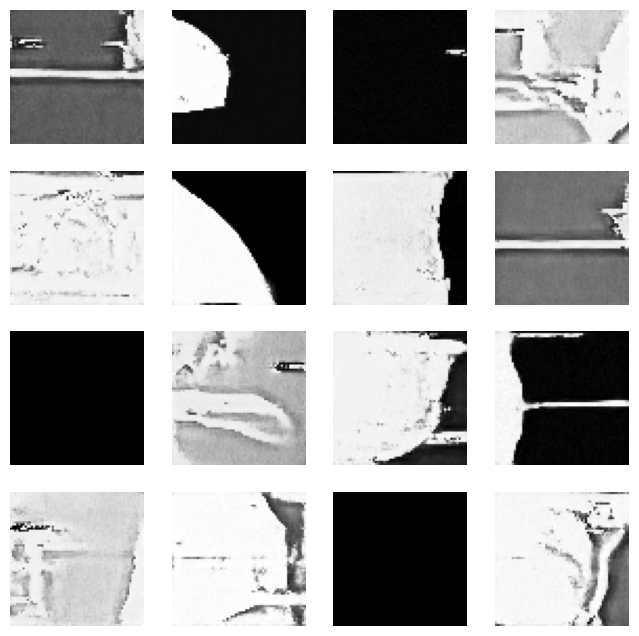

In [34]:
import matplotlib.pyplot as plt

# out_dir = ckpt_path.parent / "inference_samples"
# out_dir.mkdir(exist_ok=True)
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.axis('off')
    plt.imshow(samples[i, 0].cpu(), cmap='gray', vmin=0, vmax=1)
    # plt.imsave(out_dir / f"sample_{i:02d}.png", img_np, cmap="gray")
plt.show()
